## 1. Import the necessary libraries

In [1]:
from scipy import stats 
import numpy as np
import pandas as pd

from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import seaborn               as     sns
import matplotlib.pyplot     as     plt
import math

%matplotlib inline

## 2. Read the data as a data frame

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## 3. Perform basic EDA which should include the following  and print out your insights at every step.

### a. Shape of the data  

In [4]:
df.shape

(1338, 7)

### b. Data type of each attribute 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## OR

In [6]:
for i in df:
    print(i,"-",df[i].dtype)

age - int64
sex - object
bmi - float64
children - int64
smoker - object
region - object
charges - float64


### c. Checking the presence of missing values

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### d. 5 point summary of numerical attributes 

In [8]:
# The 5 point summary consists of the minimum value, the first quartile, the median, the third quartile, and the maximum value
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 

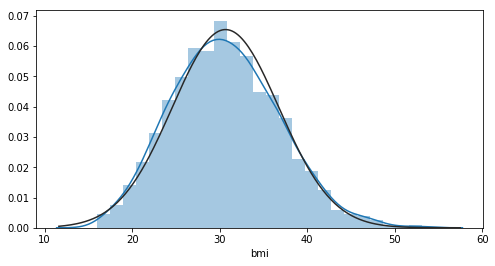

In [9]:
## BMI
plt.figure(figsize=(8,4))
sns.distplot(df.bmi,fit = stats.norm)


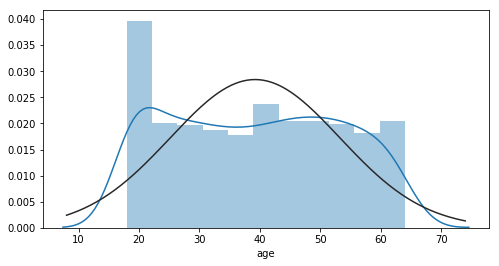

In [10]:
## AGE
plt.figure(figsize=(8,4))
sns.distplot(df.age,fit = stats.norm)

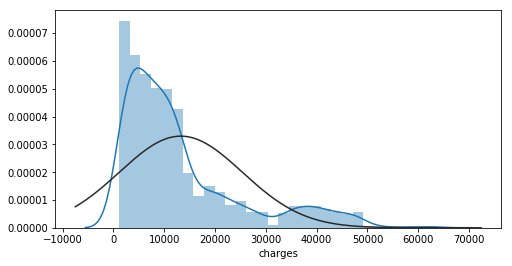

In [11]:
## Charges
plt.figure(figsize=(8,4))
sns.distplot(df.charges,fit = stats.norm)

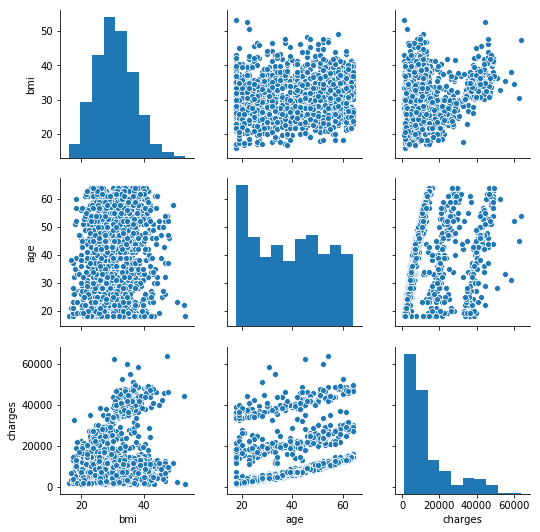

In [12]:
sns.pairplot(df[['bmi','age','charges']])

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns 

In [13]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

#### Definition of skewness
Negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right

If skewness is less than −1 or greater than +1, the distribution is highly skewed.

If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.

If skewness is between −½ and +½, the distribution is approximately symmetric.

In [14]:
x=['bmi','age','charges']
for i in x:
    if(df[i].skew()<-1) or (df[i].skew()>1):
        print('Distribution of ',i,' is highly skewed')
    elif((df[i].skew()>-1) and (df[i].skew()<-0.5)) or ((df[i].skew()>0.5) and (df[i].skew()<1)):
        print('Distribution of ',i,' is moderately skewed')
    else:
        print('Distribution of ',i,' is approximately symmetrical')


Distribution of  bmi  is approximately symmetrical
Distribution of  age  is approximately symmetrical
Distribution of  charges  is highly skewed


### g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns 

34.69375
26.29625
IQR is = 8.3975
Lower bound = 13.7
Upper bound = 47.290000000000006
So anything outside of 13.7  and  47.290000000000006  is an outlier.
There are  9  outliers


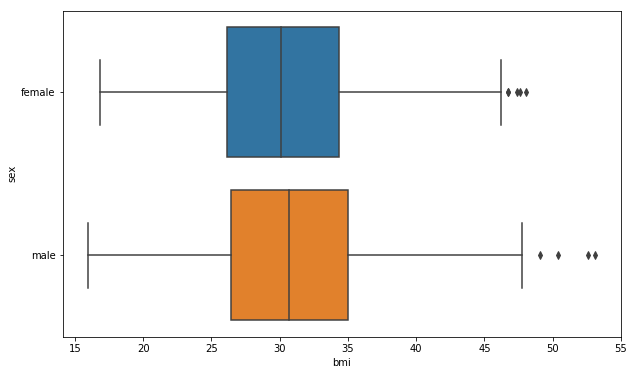

In [15]:
#****************BMI**************************
plt.figure(figsize=(10,6))
sns.boxplot(x='bmi',y='sex',data=df)
q3,q1=np.percentile(df['bmi'],[75,25])
print(q3)
print(q1)
IQR=q3-q1
print('IQR is =',IQR)
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR) 
print('Lower bound =', lower_bound)
print('Upper bound =', upper_bound)
print('So anything outside of',lower_bound, ' and ',upper_bound ,' is an outlier.')
outlier=0
for i in df['bmi']:
    if (i<lower_bound) or (i>upper_bound):
        outlier+=1
print('There are ',outlier,' outliers')
        

51.0
27.0
IQR is = 24.0
Lower bound = -9.0
Upper bound = 87.0
So anything outside of -9.0  and  87.0  is an outlier.
There are  0  outliers


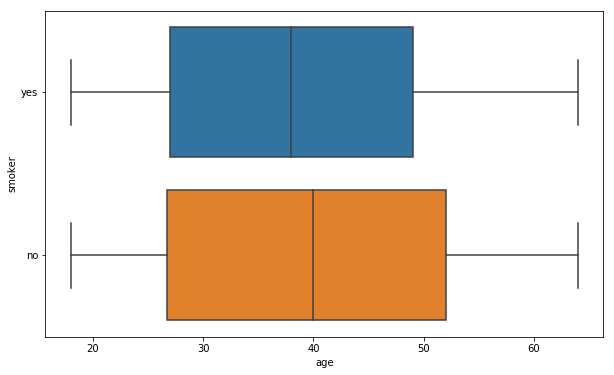

In [16]:
#AGE
plt.figure(figsize=(10,6))
sns.boxplot(x='age',y='smoker',data=df)
q3,q1=np.percentile(df['age'],[75,25])
print(q3)
print(q1)
IQR=q3-q1
print('IQR is =',IQR)
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR) 
print('Lower bound =', lower_bound)
print('Upper bound =', upper_bound)
print('So anything outside of',lower_bound, ' and ',upper_bound ,' is an outlier.')
outlier=0
for i in df['age']:
    if (i<lower_bound) or (i>upper_bound):
        outlier+=1
print('There are ',outlier,' outliers')

16639.912515
4740.28715
IQR is = 11899.625365
Lower bound = -13109.1508975
Upper bound = 34489.350562499996
So anything outside of -13109.1508975  and  34489.350562499996  is an outlier.
There are  139  outliers


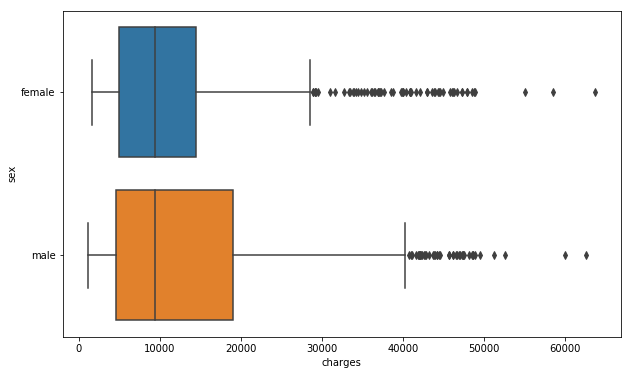

In [17]:
#Charges
plt.figure(figsize=(10,6))
sns.boxplot(x='charges',y='sex',data=df)
q3,q1=np.percentile(df['charges'],[75,25])
print(q3)
print(q1)
IQR=q3-q1
print('IQR is =',IQR)
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR) 
print('Lower bound =', lower_bound)
print('Upper bound =', upper_bound)
print('So anything outside of',lower_bound, ' and ',upper_bound ,' is an outlier.')
outlier=0
for i in df['charges']:
    if (i<lower_bound) or (i>upper_bound):
        outlier+=1
print('There are ',outlier,' outliers')

### h. Distribution of categorical columns (include  children)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


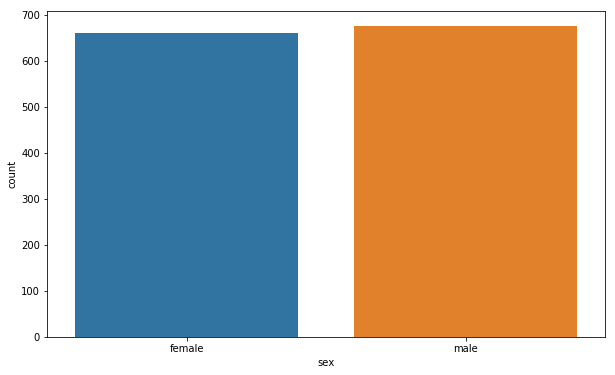

In [19]:
#Gender
plt.figure(figsize=(10,6))
sns.countplot(df.sex,data=df)


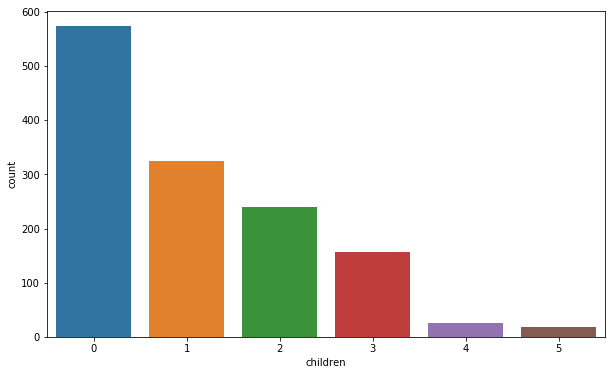

In [20]:
#Children
plt.figure(figsize=(10,6))
sns.countplot(df.children,data=df)

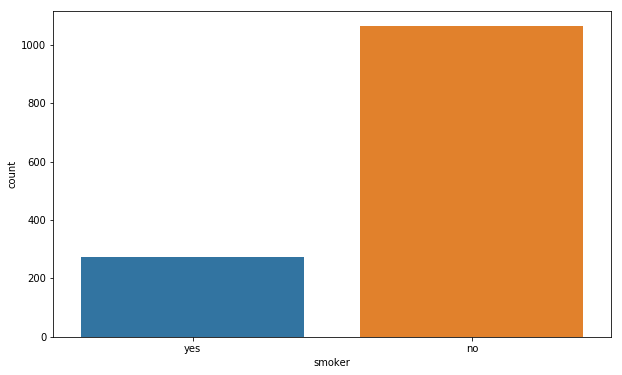

In [21]:
#Smokers
plt.figure(figsize=(10,6))
sns.countplot(df.smoker,data=df)

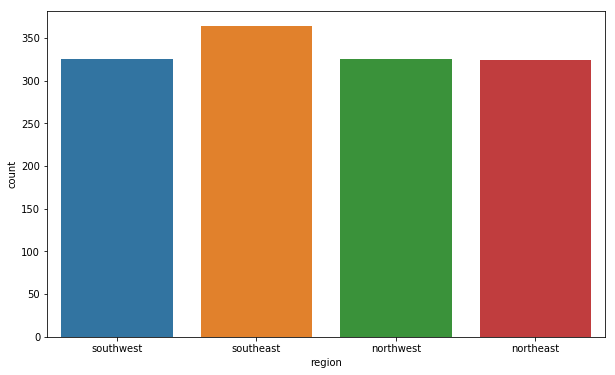

In [22]:
#Region
plt.figure(figsize=(10,6))
sns.countplot(df.region,data=df)

### i. Pair plot that includes all the columns of the data  frame

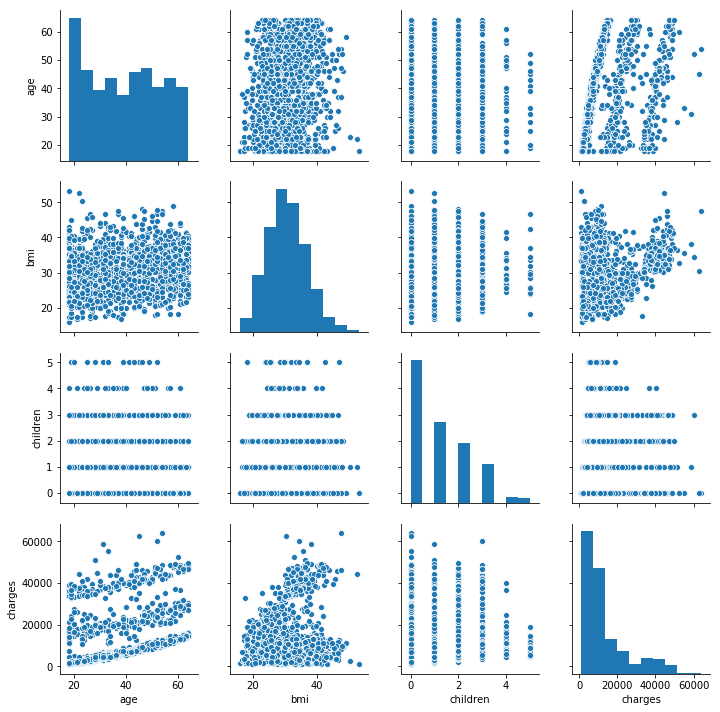

In [23]:
sns.pairplot(df)

## 4. Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly  from the people who don't?

* $H_0$: $\mu_Y$ = $\mu_N$ i.e. Charges dont differ
* $H_A$: $\mu_Y$ != $\mu_N$ i.e. Charges differ

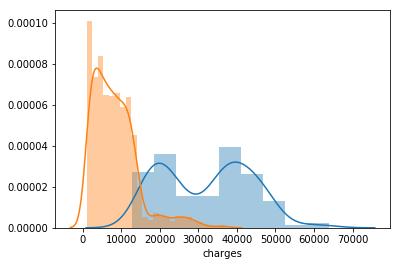

In [24]:
sns.distplot(df[df.smoker=='yes'].charges,label='Smoker: yes')
sns.distplot(df[df.smoker=='no'].charges,label='Smoker: no')

In [25]:
## Checking with the internal scipy function
t2, p2 = stats.ttest_ind(df[df.smoker=='yes'].charges,df[df.smoker=='no'].charges)
print("t = " + str(t2))
print("p = " + str(p2))
if p2<0.05:
    print("Reject Null ,i.e- Means are not equal(The charges differ for smokers and non smokers)")
else:
    print('Fail to reject null, i.e - Means are equal((The charges are same for smokers and non smokers))')

t = 46.664921172723716
p = 8.271435842177219e-283
Reject Null ,i.e- Means are not equal(The charges differ for smokers and non smokers)


Text(0.5, 1.0, 'Smokers Vs Charges')

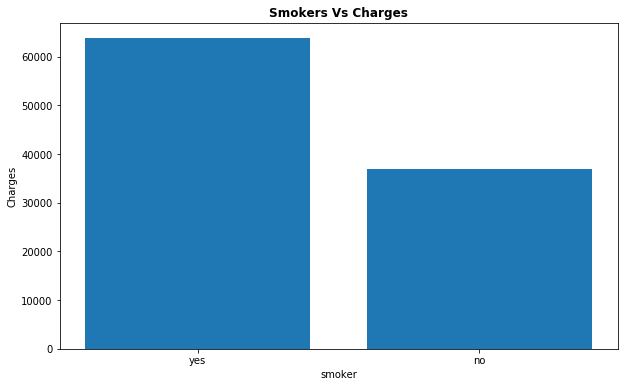

In [26]:
plt.figure(figsize=(10,6))
plt.bar(df['smoker'],df.charges)
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title("Smokers Vs Charges",weight="bold")

### b. Does bmi of males differ significantly from that of  females?

* $H_0$: $\mu_F$ = $\mu_M$ i.e. The BMI does not differ
* $H_A$: $\mu_F$ != $\mu_M$ i.e. The BMI differs

In [27]:
df_female=df[df.sex =='female']
df_male=df[df.sex=='male']

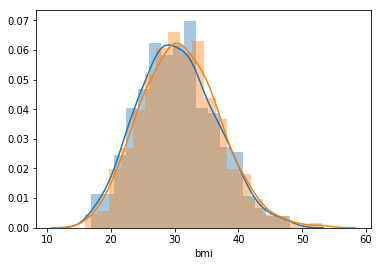

In [28]:
sns.distplot(df_female.bmi,label='Female BMI')
sns.distplot(df_male.bmi,label='Male BMI')

In [29]:
n1=df_female.bmi.size
n2=df_male.bmi.size
N=(n1+n2)/2
var_f = df_female.bmi.var(ddof=1)
var_m = df_male.bmi.var(ddof=1)
s = np.sqrt((var_f + var_m)/2)
t = (df_female.bmi.mean() - df_male.bmi.mean())/(s*np.sqrt(2/N))
df1 = (n1-1)+(n2-1)
p = 2*(stats.t.cdf(t,df=df1))
print("t_statistic = " + str(t))
print("p_value = " + str(p))

t_statistic = -1.6969832679864436
p_value = 0.08993274644781157


In [43]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(df_female.bmi,df_male.bmi)
print("t = " + str(t2))
print("p = " + str(p2))
if p2<0.05:
    print("Reject Null ,i.e- Means are not equal(The BMI differs for Male and Female)")
else:
    print('Fail to reject null, i.e - Means are equal(The BMI of males does not differ significantly from that of females)')

t = -1.696752635752224
p = 0.08997637178984932
Fail to reject null, i.e - Means are equal(The BMI of males does not differ significantly from that of females)


Text(0.5, 1.0, 'BMI Vs Gender')

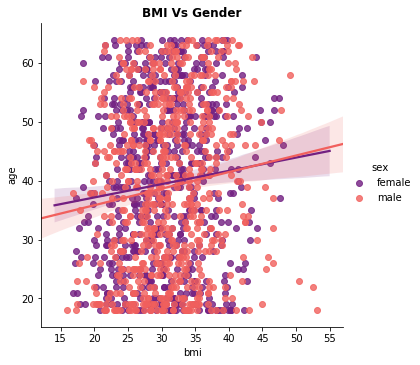

In [31]:
sns.lmplot(x="bmi",y="age",hue="sex",data=df,fit_reg=True,palette="magma")
plt.title("BMI Vs Gender",weight="bold")

### c. Is the proportion of smokers significantly different  in different genders?

The H0 (Null Hypothesis): There is no relationship between smoker and gender.

The H1 (Alternative Hypothesis): There is a relationship between smoker and gender.

In [32]:
from scipy.stats import chisquare,chi2_contingency,chi2

In [33]:
cont=pd.crosstab(df.sex,df.smoker)
print(cont)
print("\n")
stat, p, dof, expected=chi2_contingency(cont)
print("===Chi2 Stat===")
print(stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p)
print("\n")
print("===Contingency Table===")
print(expected)
print("\n")

if p>0.05:
    print('No relationship (i.e. Fail to reject null hypothesis)')
else:
    print(' There is a relationship between smoker and gender.(i.e. Reject the null hypothesis)')

smoker   no  yes
sex             
female  547  115
male    517  159


===Chi2 Stat===
7.39291081459996


===Degrees of Freedom===
1


===P-Value===
0.006548143503580696


===Contingency Table===
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


 There is a relationship between smoker and gender.(i.e. Reject the null hypothesis)


## OR

In [52]:
# Checking for the population who smokes using the function chisquare with given data and expected contingency table
chisq,p=chisquare([115,159],[135.55,138.43])
print("===Chi2 Stat===")
print(chisq)
print("\n")

print("===P-Value===")
print(p)
print("\n")
if p>0.05:
    print('No relationship (i.e. Fail to reject null hypothesis)')
else:
    print(' There is a relationship between smoker and gender.(i.e. Reject the null hypothesis)')

===Chi2 Stat===
6.172072275555353


===P-Value===
0.012978249977223844


 There is a relationship between smoker and gender.(i.e. Reject the null hypothesis)


#If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
#If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.


#If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
#If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.


In [53]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=3.841, stat=7.393
Dependent (reject H0)
significance=0.050, p=0.013
Dependent (reject H0)


Text(0.5, 1.0, 'Smokers Vs Gender')

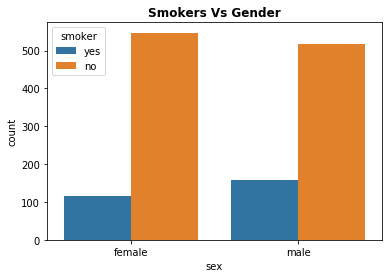

In [36]:
sns.countplot(df.sex,data=df,hue='smoker')
plt.title("Smokers Vs Gender",weight="bold")

### d. Is the distribution of bmi across women with no  children, one child and two children, the same ? 

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$ i.e. the distribution is same
* $H_A$: At least one $\mu$ differs i.e. the distribution is different

In [37]:
child_0=df[df['children']==0]
child_1=df[df['children']==1]
child_2=df[df['children']==2]

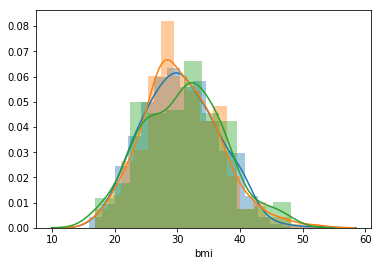

In [38]:
sns.distplot(child_0.bmi,label='0-Child')
sns.distplot(child_1.bmi,label='1-Child')
sns.distplot(child_2.bmi,label='2-Child')

In [39]:
from scipy.stats import levene, shapiro, f_oneway

# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal
levene(child_0.bmi,child_1.bmi,child_2.bmi)

LeveneResult(statistic=1.1137988954318256, pvalue=0.3286679430229422)

As p value is higher than 0.05, we fail to reject null Hypothesis which means that the columns pass equality of variance test. So, we can perform ANOVA test.

In [40]:
# Shapiro Test
# Null Hypothesis - Data is normally distributed
# Alternate Hypothesis - Data is not normally distributed
print(shapiro(child_0.bmi))
print(shapiro(child_1.bmi))
print(shapiro(child_2.bmi))
# P-value<0.05 hence data is not normal except for the bmi of women having 2 children which is >0.05


(0.9933362007141113, 0.012109939940273762)
(0.986246645450592, 0.00353239756077528)
(0.9898062348365784, 0.08954508602619171)


In [41]:
f, p = f_oneway(child_0.bmi,child_1.bmi,child_2.bmi)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

if p < 0.05:
    print('The distribution is different (reject H0)')
else:
    print('The distribution is same (fail to reject H0)')

One-way ANOVA
F value: 0.4169829280345703
P value: 0.6591330886467935 

The distribution is same (fail to reject H0)


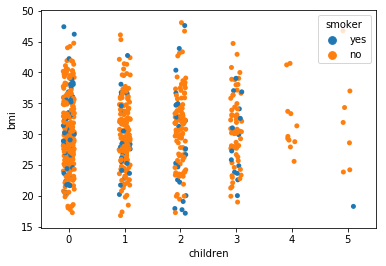

In [42]:
df_female=df[df.sex =='female']
sns.stripplot(df_female.children,df_female.bmi,data=df_female,hue='smoker')